In [1]:
import h5py
import numpy as np

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [2]:
hf = h5py.File('/scratch/ns4486/numerical-relativity-interpolation/Proca_fiducial_scaled_cropped.hdf5', 'r')

In [3]:
x = hf.get('Train').get('input')
y = hf.get('Train').get('target')

In [4]:
inputs = np.array(x)
outputs = np.array(y)

In [5]:
inputs.shape, outputs.shape

((407, 2, 72, 72, 72), (407, 1, 72, 72, 72))

In [6]:
inputs.mean(), inputs.max(), inputs.min()

(0.02135032497171533, 12.818851690213632, 0.0)

In [7]:
inputs[0, 0].shape

(72, 72, 72)

In [9]:
new_input = inputs[:, 0, 35, :, :]

In [19]:
import matplotlib.pyplot as plt


(array([2.98120e+04, 1.34208e+05, 1.73610e+05, 1.63372e+05, 1.43098e+05,
        1.22736e+05, 1.06852e+05, 9.07320e+04, 7.87640e+04, 6.84820e+04,
        5.99080e+04, 5.31580e+04, 4.76880e+04, 4.31820e+04, 3.79980e+04,
        3.54460e+04, 3.25600e+04, 2.96180e+04, 2.78280e+04, 2.51880e+04,
        2.43680e+04, 2.18740e+04, 2.15480e+04, 1.92240e+04, 1.85520e+04,
        1.81820e+04, 1.61600e+04, 1.60840e+04, 1.54200e+04, 1.42060e+04,
        1.38540e+04, 1.34680e+04, 1.24640e+04, 1.19800e+04, 1.19460e+04,
        1.12340e+04, 1.05140e+04, 1.01400e+04, 1.01940e+04, 9.52000e+03,
        9.08600e+03, 8.87600e+03, 8.59400e+03, 8.26200e+03, 7.82800e+03,
        7.37000e+03, 7.41600e+03, 7.02600e+03, 6.68600e+03, 6.52000e+03,
        6.32800e+03, 6.25800e+03, 5.91800e+03, 5.49600e+03, 5.36800e+03,
        5.40800e+03, 5.30400e+03, 5.05000e+03, 4.76600e+03, 4.62600e+03,
        4.28600e+03, 4.36600e+03, 4.38200e+03, 4.25200e+03, 3.98200e+03,
        3.79800e+03, 3.59200e+03, 3.54200e+03, 3.55

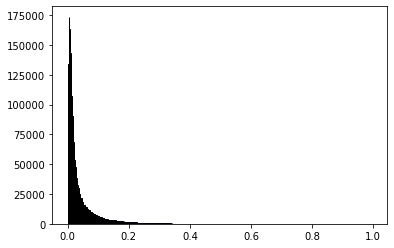

In [25]:
plt.hist(new_input.flatten()[new_input.flatten() < 1], color = 'blue', edgecolor = 'black',bins = 500)


In [16]:
new_input

array([[0.00037818, 0.00044099, 0.00051271, ..., 0.00051271, 0.00044099,
        0.00037818],
       [0.00044519, 0.00052006, 0.00060573, ..., 0.00060573, 0.00052006,
        0.00044519],
       [0.00052263, 0.00061163, 0.00071366, ..., 0.00071366, 0.00061163,
        0.00052263],
       ...,
       [0.00052739, 0.00061738, 0.00072059, ..., 0.00072059, 0.00061738,
        0.00052739],
       [0.00044928, 0.00052499, 0.00061165, ..., 0.00061165, 0.00052499,
        0.00044928],
       [0.00038168, 0.0004452 , 0.00051776, ..., 0.00051776, 0.0004452 ,
        0.00038168]])

In [ ]:
cats = pd.qcut(new_input.flatten(), q=30)

In [33]:
color_interval_values = []
color = 1
# i = 1
for interval in list(cats.categories):
    color_interval_values.append([interval.left, interval.right, color])
#     if i % 2 == 0:
    color += 1
#     i += 1

In [34]:
color_intervals_df = pd.DataFrame(color_interval_values, columns=['left', 'right', 'color'])
color_intervals_df

,left,right,color
0,-0.00100,0.00273,1
1,0.00273,0.00370,2
2,0.00370,0.00453,3
3,0.00453,0.00533,4
4,0.00533,0.00613,5
5,0.00613,0.00696,6
6,0.00696,0.00785,7
7,0.00785,0.00879,8
8,0.00879,0.00980,9
9,0.00980,0.01090,10


In [41]:
def estimate_color(x):
    for index, row in color_intervals_df.iterrows():
        if x > row.left and x <= row.right:
            return row.color
    if x <= color_intervals_df.iloc[0]['left']:
        return 1
    else:
        return 30

In [53]:
location_value = []
frame = 0
index = 0

for i in range(new_input[index].shape[0]):
    for j in range(new_input[index].shape[1]):
        location_value.append([i, j, new_input[index, i, j]])

df = pd.DataFrame(data = location_value, columns=['x', 'y', 'value'])

# df = df[df['value']>0.1]

df['color'] = df['value'].apply(estimate_color)

fig = px.scatter(df, x='x', y='y', color='color', range_color = [1, 30], color_continuous_scale='Viridis', width=800, height=800)

fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))

fig.show()

In [54]:
import tqdm

In [55]:
for index in tqdm.tqdm(range(new_input.shape[0])):
    location_value = []
    frame = 0

    for i in range(new_input[index].shape[0]):
        for j in range(new_input[index].shape[1]):
            location_value.append([i, j, new_input[index, i, j]])

    df = pd.DataFrame(data = location_value, columns=['x', 'y', 'value'])

    # df = df[df['value']>0.1]

    df['color'] = df['value'].apply(estimate_color)

    fig = px.scatter(df, x='x', y='y', color='color', range_color = [1, 30], color_continuous_scale='Viridis', width=800, height=800)

    fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))

    fig.write_image(f'/scratch/prs392/capstone/original_simulation_2d/images/{index}.png', width=800, height=800)

100%|██████████| 407/407 [44:43<00:00,  6.59s/it]
